In [1]:
import numpy as np
from neural_network.layer import *
from neural_network.net import *
from queue import Queue
import matplotlib.pyplot as plt
from tqdm import tqdm
from neural_network.trainutils import Dataset, train_test_split
import os

In [2]:
current_dir = os.getcwd()
face_dir = os.path.join(current_dir, "cmu+face+images", "faces")
dataset = Dataset(face_dir, flatten=False)

In [3]:
dataset.data.shape

(624, 120, 128)

In [4]:
train, validation, test = train_test_split(dataset, (0.8, 0.0, 0.2))

In [5]:
len(train)

499

In [6]:
dataset[500][0].shape

(1, 1, 120, 128)

In [7]:
input_shape = train[0][0].shape
input_shape

(1, 1, 120, 128)

In [8]:
train[0]

(array([[[[-0.53781922, -1.00700955, -1.87643687, ..., -1.75327781,
           -1.727518  , -1.20809095],
          [-0.5563398 , -1.01038161, -1.75703117, ..., -1.7262451 ,
           -1.63630696, -1.15674693],
          [-1.413042  , -1.34143483, -1.51738675, ..., -1.6662946 ,
           -1.51169855, -0.93831683],
          ...,
          [-0.9025624 , -0.95363094, -0.80844859, ..., -0.39349758,
           -0.03855206,  0.2316823 ],
          [-0.89661588, -0.91519234, -0.83310092, ..., -0.3278346 ,
            0.01872114,  0.24993426],
          [-0.7802091 , -0.76510291, -0.73072724, ..., -0.32810734,
            0.05394545,  0.19221374]]]]),
 array([[0.],
        [0.],
        [1.],
        [0.]]))

In [9]:
kernel_shape = np.ndarray([1, 1, 3, 3])
pad = 1
stride = 1

conv1 = Conv2D(kernel_shape, pad, stride, layer_id=1) # 120x128
maxpool1 = MaxPool2D(2, 0, 2, conv1) # 60x64
relu1 = ReLU(maxpool1)

conv2 = Conv2D(kernel_shape, pad, stride, relu1, layer_id=2)
maxpool2 = MaxPool2D(2, 0, 2, conv2) # 30x32
relu2 = ReLU(maxpool2)

conv3 = Conv2D(kernel_shape, pad, stride, relu2, layer_id=3)
maxpool3 = MaxPool2D(2, 0, 2, conv3) # 15x16
relu3 = ReLU(maxpool3)

flatten = Flatten(relu3)

linear = Linear(15*16, len(dataset.keys), flatten)
softmax_layer = Softmax(linear)
loss_layer = CrossEntropy(softmax_layer)

model = NeuralNetwork(conv1, softmax_layer, loss_layer)

In [10]:
kernel_shape.shape

(1, 1, 3, 3)

In [11]:
print("Forward order:")
for layer in model._forward_order:
    print(layer)

print("\nBackward order:")
for layer in model._backward_order:
    print(layer)

Forward order:
Conv2D 1: (1, 1, 3, 3), pad=1, stride=1
MaxPool2D: (2, 2), pad=0, stride=2
ReLU
Conv2D 2: (1, 1, 3, 3), pad=1, stride=1
MaxPool2D: (2, 2), pad=0, stride=2
ReLU
Conv2D 3: (1, 1, 3, 3), pad=1, stride=1
MaxPool2D: (2, 2), pad=0, stride=2
ReLU
Flatten
Linear: (240, 1) -> (4, 1)
Softmax
CrossEntropy

Backward order:
CrossEntropy
Softmax
Linear: (240, 1) -> (4, 1)
Flatten
ReLU
MaxPool2D: (2, 2), pad=0, stride=2
Conv2D 3: (1, 1, 3, 3), pad=1, stride=1
ReLU
MaxPool2D: (2, 2), pad=0, stride=2
Conv2D 2: (1, 1, 3, 3), pad=1, stride=1
ReLU
MaxPool2D: (2, 2), pad=0, stride=2
Conv2D 1: (1, 1, 3, 3), pad=1, stride=1


In [12]:
loss_array = []
pbar = tqdm(range(50))
for i in pbar:
    epoch_loss = 0
    for data, label in train:
        #data = data.reshape(-1, 1)
        out = model.forward(data)
        #print(out)
        loss = model.loss_layer.forward(out, label)
        epoch_loss += loss
        model.backward()
        model.step()
    epoch_loss = epoch_loss / len(train)
    loss_array.append(epoch_loss)
    pbar.set_description(str(epoch_loss))

  0%|          | 0/50 [00:00<?, ?it/s]

[0.00229426]: 100%|██████████| 50/50 [02:54<00:00,  3.49s/it]


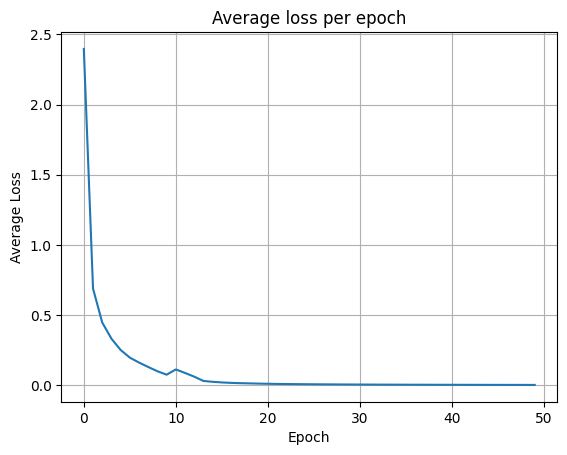

In [13]:
plt.plot(loss_array[:50])
plt.title("Average loss per epoch")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.grid()

In [14]:
unique, counts = np.unique(dataset.label, return_counts=True)

In [15]:
print(dataset.keys[unique])
print(counts)

['left' 'right' 'straight' 'up']
[157 155 156 156]


In [18]:
from PIL import Image
my_img = Image.open("test/woman_straight.jpg").convert("L")
my_img = np.array(my_img)#.reshape(-1, 1)
my_img.shape

AttributeError: 'Image' object has no attribute 'shape'

In [17]:
model.forward(my_img)

ValueError: not enough values to unpack (expected 4, got 2)